In [2]:
import pandas as pd
import pickle

In [ ]:
#The objective is to analyze the flight
#booking dataset obtained from a
#tickets. A thorough study of the data
#will aid in the discovery of valuable
#insights that will be of enormous
#value to passengers. Apply EDA,
#learning algorithms in order to get
#meaningful information from it

In [3]:
data =pd.read_csv("C:\\Users\\thadv\\OneDrive\\Desktop\\Flight_Booking.csv")

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.drop(columns=['Unnamed: 0','flight'],axis=1,inplace=True)

In [5]:
data.sort_values(by='price',ascending=False)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,Kolkata,Morning,one,Night,Delhi,Business,13.50,3,123071
216096,Vistara,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307
215859,Vistara,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
277345,Vistara,Hyderabad,Night,one,Afternoon,Mumbai,Business,16.42,3,115211
270999,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Business,9.50,17,114705
...,...,...,...,...,...,...,...,...,...,...
204375,AirAsia,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,22,1105
204376,GO_FIRST,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,22,1105
206598,Indigo,Chennai,Early_Morning,one,Afternoon,Hyderabad,Economy,7.33,49,1105
206599,Indigo,Chennai,Afternoon,one,Night,Hyderabad,Economy,7.50,49,1105


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [7]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [19]:
data.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='airline', ylabel='price'>

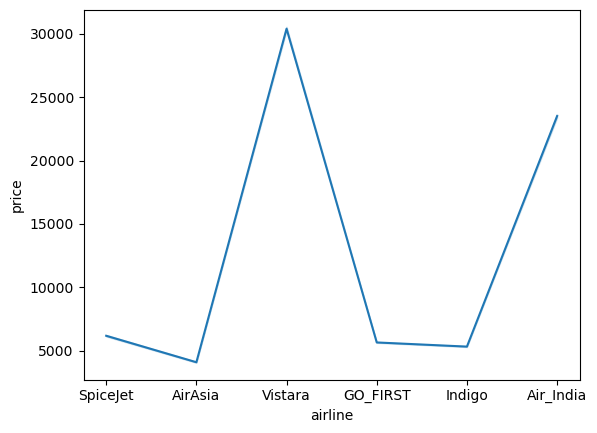

In [9]:
sb.lineplot(data=data,x=data['airline'],y=data['price'])

<Axes: xlabel='class', ylabel='price'>

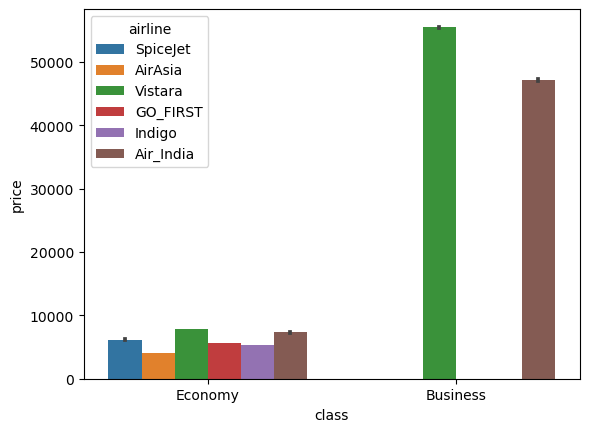

In [11]:
sb.barplot(data=data,x='class',y='price',hue='airline')

<Axes: xlabel='airline', ylabel='price'>

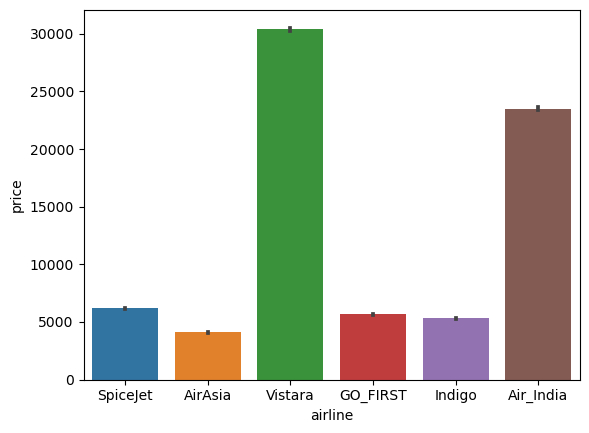

In [10]:
sb.barplot(data=data,x=data['airline'],y='price')

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()

In [13]:
data['airline']=encoder.fit_transform(data['airline'])
data['source_city']=encoder.fit_transform(data['source_city'])
data['departure_time']=encoder.fit_transform(data['departure_time'])
data['stops']=encoder.fit_transform(data['stops'])
data['arrival_time']=encoder.fit_transform(data['arrival_time'])
data['destination_city']=encoder.fit_transform(data['destination_city'])

data['class']=encoder.fit_transform(data['class'])

In [14]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [15]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


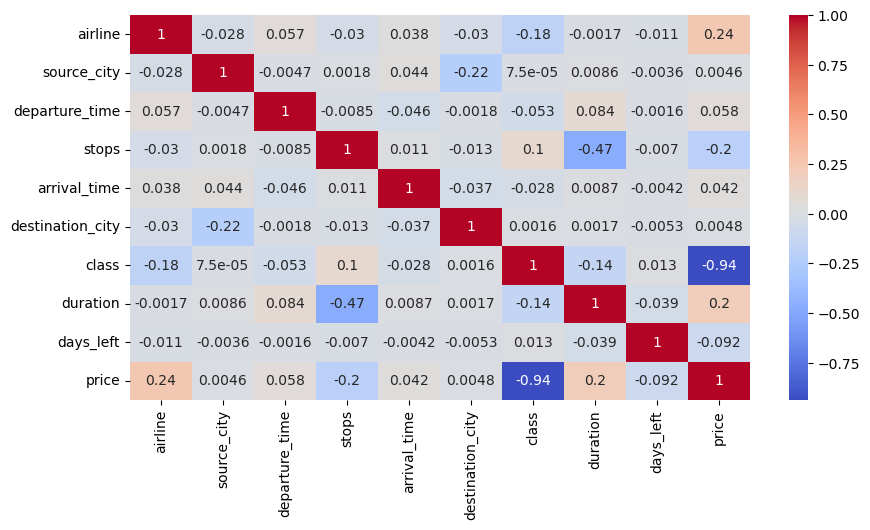

In [16]:
plt.figure(figsize=(10,5))
sb.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
col_list=[]
for col in data.columns:
    if((data[col].dtype!='object'))&(col!='price'):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data['featurs']=x.columns
vif_data['vifvalues']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)


            featurs  vifvalues
0           airline   3.393124
1       source_city   2.927766
2    departure_time   2.779427
3             stops   1.426614
4      arrival_time   3.684550
5  destination_city   2.885337
6             class   2.849370
7          duration   4.113876
8         days_left   3.976790


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
x=data.drop(columns=['price'],axis=1)
y=data['price']

In [22]:
import numpy as np

In [23]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
linearmodel=LinearRegression()
model=linearmodel.fit(x_train,y_train)
linearmodel.score(x_test,y_test)
predict=linearmodel.predict(x_test)

In [24]:
linearmodel.score(x_test,y_test)

0.9036625399873525

In [ ]:
 with open("flight prediction model.pickle","wb") as model_file:
        pickle.dump(model,model_file)

In [ ]:
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))

In [25]:
diffrence=pd.DataFrame(np.c_[y_test,predict],columns=['actual','predict'])


In [26]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,roc_auc_score

In [27]:
r2_score(y_test,predict)

0.9036625399873525

In [28]:
mse=mean_squared_error(y_test,predict)

In [29]:
np.sqrt(mse)

7073.10927672408

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
dt=DecisionTreeRegressor()
dt_model=dt.fit(x_train,y_train)

In [32]:
y_pre=dt.predict(x_test)

In [33]:
r2_score(y_test,y_pre)

0.9769655889245551

In [34]:
diff=pd.DataFrame(np.c_[y_test,y_pre],columns=['actual','predict'])
diff

,actual,predict
0,4550.0,4550.0
1,31896.0,31896.0
2,8949.0,11364.0
3,65529.0,65529.0
4,74956.0,74956.0
...,...,...
60026,4541.0,5803.0
60027,3501.0,3291.0
60028,4339.0,4190.0
60029,6319.0,6319.0


In [35]:
diff[diff['actual']==diff['predict']]

,actual,predict
0,4550.0,4550.0
1,31896.0,31896.0
3,65529.0,65529.0
4,74956.0,74956.0
8,6027.0,6027.0
...,...,...
60021,4048.0,4048.0
60024,64173.0,64173.0
60025,49207.0,49207.0
60029,6319.0,6319.0


In [36]:
a=mean_squared_error(y_test,y_pre)
np.sqrt(a)

3458.6078947029005

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr=RandomForestRegressor(n_estimators=100)

In [39]:
model=rfr.fit(x_train,y_train)


In [40]:
predict=rfr.predict(x_test)

In [41]:
diffre=pd.DataFrame(np.c_[y_test,predict],columns=['actual','predict'])
diffre

,actual,predict
0,4550.0,4650.37
1,31896.0,33315.50
2,8949.0,9861.39
3,65529.0,65441.74
4,74956.0,70502.88
...,...,...
60026,4541.0,5394.07
60027,3501.0,3476.51
60028,4339.0,4189.36
60029,6319.0,6318.06


In [49]:
round(r2_score(y_test,predict)*100,4)

98.5143

In [43]:
diffre[diffre['actual']==diffre['predict']]

,actual,predict
9,12114.0,12114.0
10,69168.0,69168.0
12,4111.0,4111.0
19,5943.0,5943.0
22,52287.0,52287.0
...,...,...
60006,45693.0,45693.0
60007,4272.0,4272.0
60018,5892.0,5892.0
60021,4048.0,4048.0


In [44]:
np.sqrt(mean_squared_error(y_test,predict))

2777.6944133841935

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=6)
cross_val_score(RandomForestRegressor(),x,y,cv=cv)

array([0.98554155, 0.98557308, 0.98498185, 0.98549048, 0.98541979])